In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing


In [4]:
file = pd.read_excel('customer_churn_large_dataset.xlsx')

In [5]:
file.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [7]:
file.shape

(100000, 9)

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


There is no missing values , we don't have to handle missing values

In [18]:
file = file.drop('CustomerID Name'.split(' '), axis = 1)

In [19]:
file.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [20]:
file.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [21]:
file.duplicated().sum()

0

In [22]:
#descriptive statistics
file.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


Explorative Data Analysis


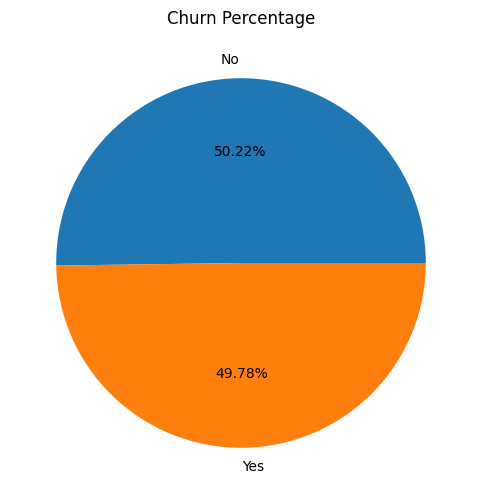

In [24]:
plt.figure(figsize=(10,6))
plt.pie(file['Churn'].value_counts(), labels = ['No','Yes'],autopct = '%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The pie chart clearly show the customer churn in dataset.Nearly half of the customer churning.


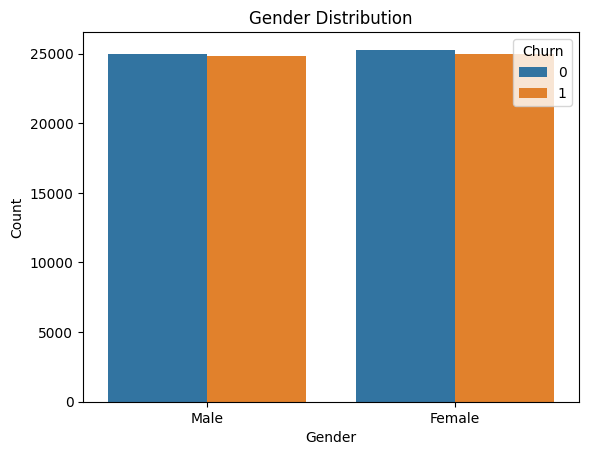

In [27]:
#gender and customer churn
sns.countplot(x = 'Gender', data = file, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As shown in graph there is no much difference between the count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer


<Axes: xlabel='Age', ylabel='Count'>

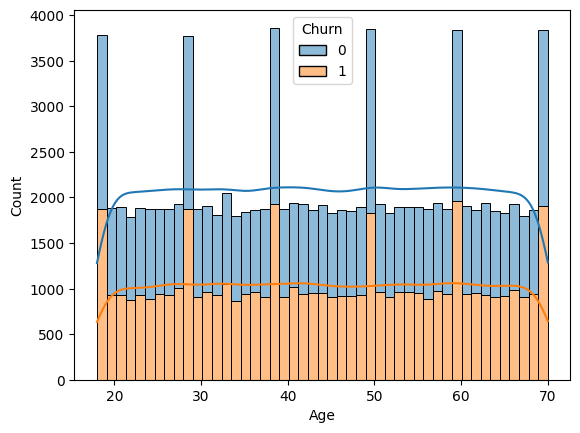

In [28]:
#Age Distribution
sns.histplot(data = file, x = 'Age', hue =  'Churn', multiple = 'stack',kde = True)

the histogram visualizes the age distribution and the churn count of the cutomers. However the customer churn count is nearly 50% in every age group also there are nearly equal number of customers of age group.


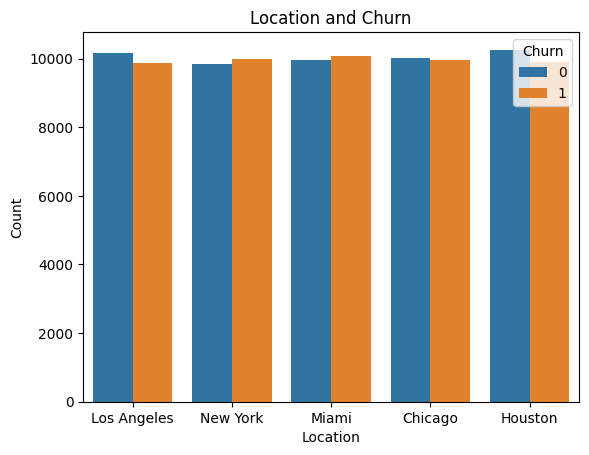

In [29]:
# customer Location
sns.countplot(x = 'Location', hue = 'Churn', data = file)
plt.title('Location and Churn')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Subscription_Length_Months', ylabel='count'>

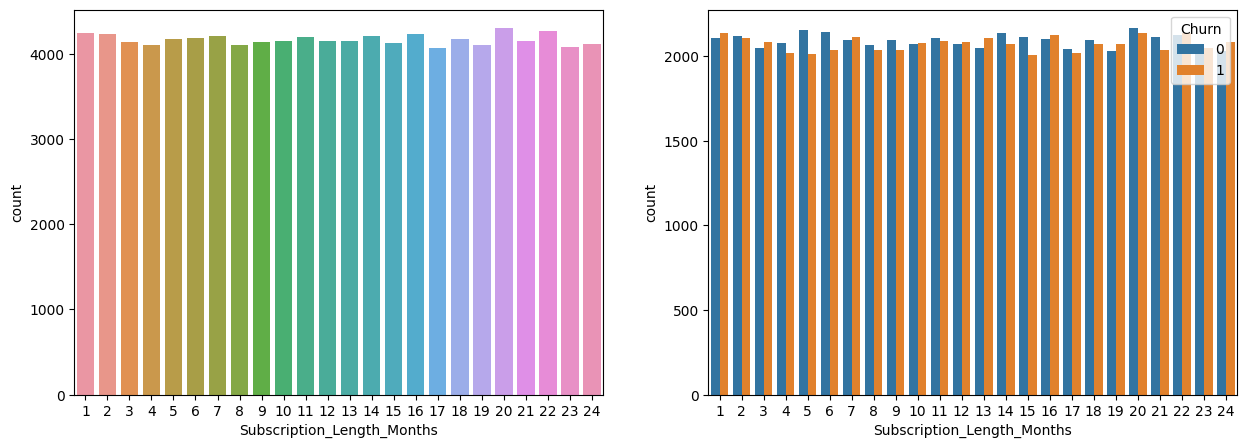

In [31]:
ig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Subscription_Length_Months', data=file,ax=ax[0])
sns.countplot(x='Subscription_Length_Months', hue='Churn', data=file,ax=ax[1])


 the customers in the dataset have a subscription between 1-24 months, having equal distribution among them. Looking at the churn 50% of the customer of same length subscription are churning. So no inference can be made.


<Axes: xlabel='Monthly_Bill', ylabel='Count'>

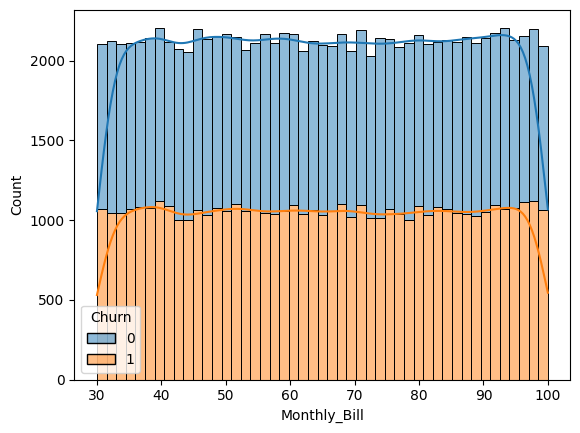

In [35]:
sns.histplot(data = file, x = 'Monthly_Bill', hue =  'Churn', multiple = 'stack',kde = True)

this graph shows the distribution of the monthly bill of ht customers along with the churn cound. On the whole there is no definite pattern in the monthly bill distribution of the customers who churned and who didn't. therefor it's not a good predictor of churn.

**DATA PREPROCESSING -2**


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
#Label Encoding
feature = ['Location', 'Gender']
le = LabelEncoder()
for i in feature:
 le.fit(file[i].unique())
 file[i]=le.transform(file[i])
 print(i,file[i].unique())



Location [2 4 3 0 1]
Gender [1 0]


In [42]:
#Normalization
scaler = StandardScaler()
file[['Subscription_Length_Months', 'Monthly_Bill',	'Total_Usage_GB']]= scaler.fit_transform(file[['Subscription_Length_Months',	'Monthly_Bill',	'Total_Usage_GB']])

In [43]:
file.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,0.651115,0.410606,-0.294289,0
1,62,0,4,-1.658879,-0.805374,-0.784852,0
2,24,0,2,-1.081380,1.009204,1.422681,0
3,36,0,3,-1.370129,1.625597,0.173279,1
4,46,0,3,0.939864,-0.341720,-0.064338,0


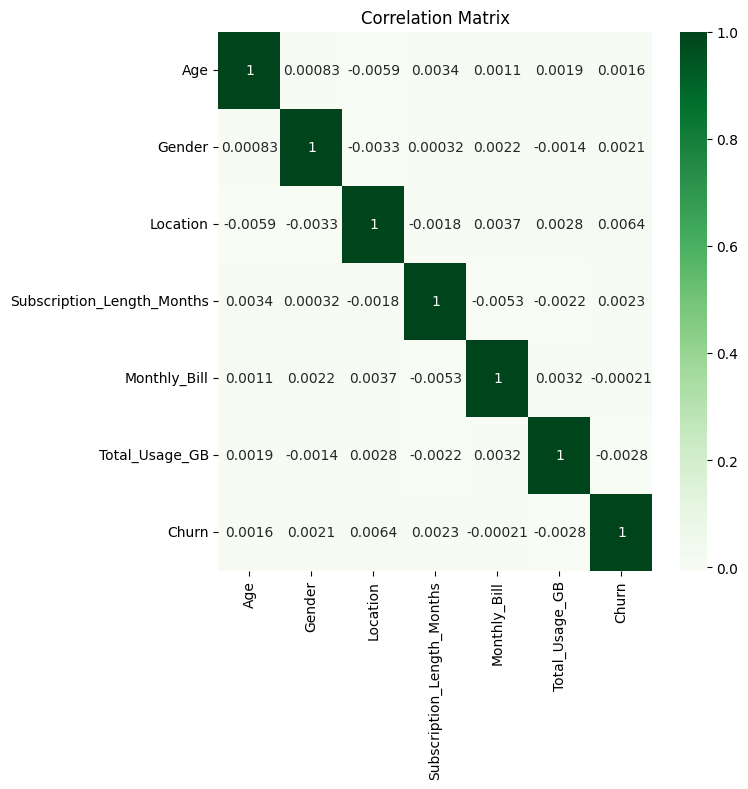

In [47]:
#Coorelatin Matrix HeatMap
plt.figure(figsize=(7,7))
sns.heatmap(file.corr(),annot=True,cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

There is no significant coorelation among the features. So, I will process to model Building


In [48]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [49]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(file.drop('Churn',axis = 1),file['Churn'], test_size= 0.3, random_state = 43)

**Decision Tree Classifier**
Using GridSearchCV to find the best parameters for the model


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'criterion':['gini', 'entropy'],
    'random_state':[0,42]
}

grid_dtree = GridSearchCV(dtree,param_grid, cv = 5, scoring = 'roc_auc', n_jobs=4)
grid_dtree.fit(Xtrain,Ytrain)

print('Best parameters found: ',grid_dtree.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'random_state': 0}


In [55]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state  = 0, min_samples_leaf=5)
dtree

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

In [58]:
dtree.fit(Xtrain, Ytrain)
dtree.score(Xtrain,Ytrain)

0.5338428571428572

In [82]:
dtree_pred = dtree.predict(Xtest)

In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier()

In [63]:
param_grid = {
 'max_depth': [2,4,6],
 'min_samples_leaf': [2,3],
 'criterion': ['gini', 'entropy'],
 'random_state': [0,42]
}

grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = 4)

grid_rfc.fit(Xtrain,Ytrain)

print("Best Parameters found: ", grid_rfc.best_params_)

Best Parameters found:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'random_state': 0}


In [64]:
rfc = RandomForestClassifier(min_samples_leaf=2, max_depth=2, criterion = 'gini', random_state =0)
rfc

RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=0)

In [65]:
rfc.fit(Xtrain, Ytrain)
rfc.score(Xtrain,Ytrain)

0.5105714285714286

In [83]:
rfc_predict = rfc.predict(Xtest)

In [70]:
#Logistic Regression
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression()

In [95]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'solver': ['liblinear'],  # Solver for logistic regression
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator= lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(Xtrain, Ytrain)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LogisticRegression(C=0.01, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [96]:
best_params = grid_search.best_params_

In [97]:
best_params

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [99]:
lr = LogisticRegression(**best_params)
lr.fit(Xtrain,Ytrain)
lr.score(Xtrain,Ytrain)

0.5064428571428572

In [100]:
lr_predict = lr.predict(Xtest)
lr_predict = (lr_predict>0.5).astype(int)

**Neural Network**


In [75]:
import tensorflow as tf

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [80]:
model.fit(Xtrain, Ytrain, epochs=50, batch_size=500, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5057 - val_loss: 0.6945 - val_accuracy: 0.4975
Epoch 2/50
112/112 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.5041
Epoch 3/50
112/112 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5034 - val_loss: 0.6994 - val_accuracy: 0.5023
Epoch 4/50
112/112 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.5034 - val_loss: 0.6935 - val_accuracy: 0.5009
Epoch 5/50
112/112 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.5023 - val_loss: 0.6937 - val_accuracy: 0.4998
Epoch 6/50
112/112 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6934 - val_accuracy: 0.5019
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5036 - val_loss: 0.6965 - val_accuracy: 0.4974
Epoch 

In [103]:
nr_predict = model.predict(Xtest)
nr_predict = (nr_predict>0.5).astype(int)

938/938 [==============================] - 2s 2ms/step


**Model Evaluation**

In [107]:
def matrix(Ytest,pred):
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(Ytest,pred),annot=True,fmt='d',cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

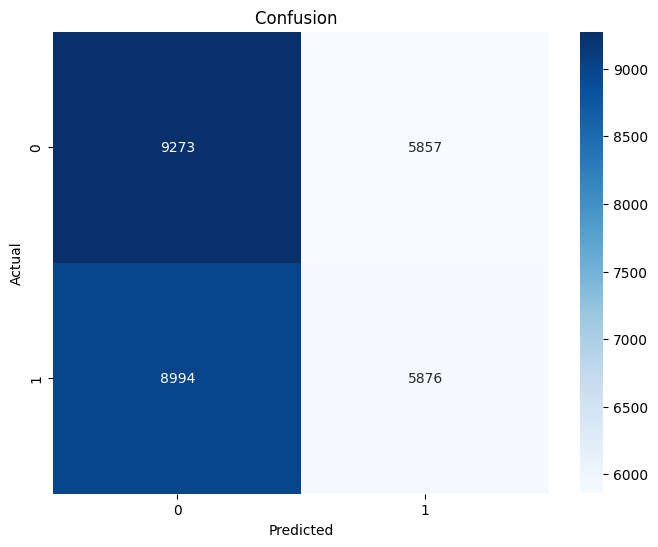

In [106]:
#Decision Tree Classifier
#confusion Matrix heatmap
matrix(Ytest,dtree_pred)


In [87]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, dtree_pred))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56     15130
           1       0.50      0.40      0.44     14870

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



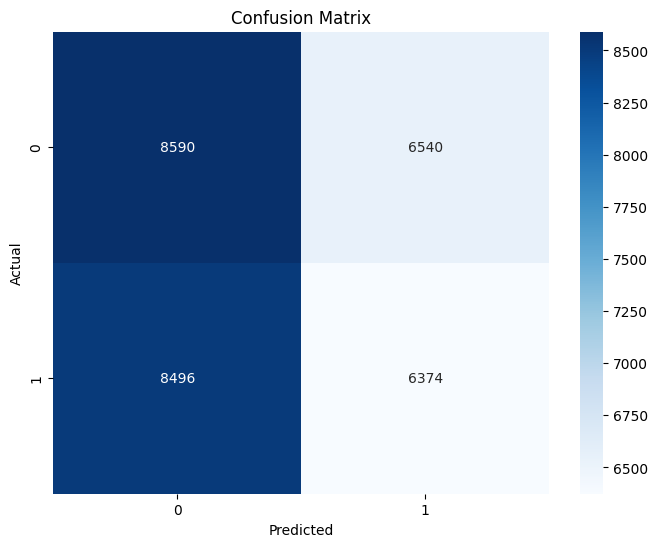

In [108]:
#Random Forest Classifier
matrix(Ytest,rfc_predict)


In [90]:
print(classification_report(Ytest, rfc_predict))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53     15130
           1       0.49      0.43      0.46     14870

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



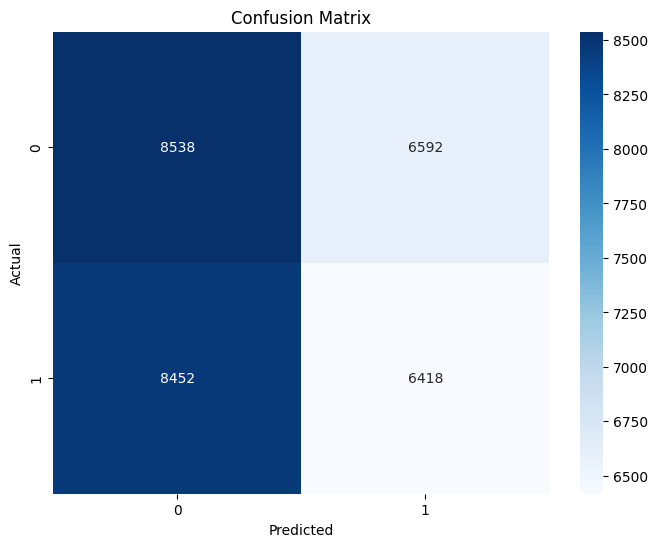

In [109]:
# Logisctic Regresion
matrix(Ytest,lr_predict)

In [102]:
print(classification_report(Ytest, lr_predict))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53     15130
           1       0.49      0.43      0.46     14870

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



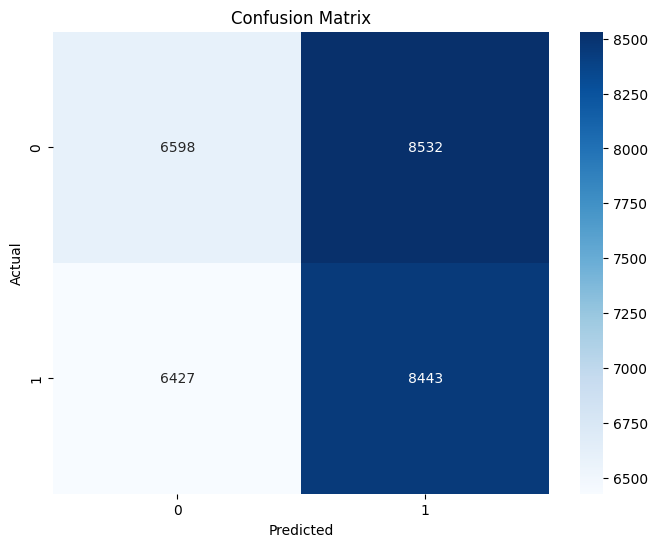

In [110]:
#neural network
matrix(Ytest,nr_predict)

In [111]:
print(classification_report(Ytest, nr_predict))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47     15130
           1       0.50      0.57      0.53     14870

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

